# 2023년 MyDramaList 평점 기반 원하는 장르의 드라마 큐레이팅

1. 장르 리스트 출력 <br>
<br>
2. 추천 받길 희망하는 장르 입력 (유효하지 않은 장르면 일반적인 장르로 대체) <br>
<br>
3. 해당 장르를 포함한 행만 추출하여 새로운 데이터프레임 생성 <br>
<br>
4. 새로운 데이터프레임 내에서 랜덤으로 하나의 드라마 정보를 시각화하여 추천 <br>

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 공백 제거 위한 정규표현식
import re
import os
import random
from PIL import Image
# 텍스트 효과적으로 시각화 위한 라이브러리
import textwrap

## 데이터 구조 확인

In [2]:
data = pd.read_csv("top100_kdrama.csv")
data_aug = pd.read_csv("top100_kdrama_aug_2023.csv") #최근 업데이트 된 데이터

In [3]:
data_aug.head() 

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Han Geu Roo is an autistic 20-year-old. He wor...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama","Uncle-Nephew Relationship, Autism, Death, Mour...",#1,9.2
1,Weak Hero Class 1,2022,"Nov 18, 2022",Friday Duration: 40 min. Content Rating: 18+ ...,8,None,40 min.,18+ Restricted (violence & profanity),Yeon Shi Eun is a model student who ranks at t...,"Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...","Action, Youth, Drama","Violence, Friendship, Bromance, School Bullyin...",#2,9.1
2,Hospital Playlist Season 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Multiple Couples,...",#3,9.1
3,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Deception, Family Secret, Mystery, Suspense, H...",#4,9.1
4,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Romance, Life, Drama, Medical","Multiple Mains, Slow Romance, Multiple Couples...",#5,9.1


In [4]:
data_aug['Name'].values

array(['Move to Heaven', 'Weak Hero Class 1',
       'Hospital Playlist Season 2', 'Flower of Evil',
       'Hospital Playlist', 'Alchemy of Souls', 'Reply 1988', 'My Mister',
       "Under the Queen's Umbrella", 'Prison Playbook',
       'The Glory Part 2', 'Mr. Queen', 'Mother', 'Dr. Romantic Season 3',
       'Crash Landing on You', 'Alchemy of Souls Season 2',
       'Extraordinary Attorney Woo', 'Vincenzo', 'Navillera',
       "It's Okay to Not Be Okay", 'Signal', 'The Glory',
       'The Good Bad Mother', 'Happiness', 'Kingdom Season 2',
       'Mr. Sunshine', 'Taxi Driver Season 2', 'Tomorrow',
       'Tale of the Nine-Tailed 1938', 'Healer', 'Mouse', 'SKY Castle',
       'The Red Sleeve', 'Stranger', 'Twenty-Five Twenty-One',
       'The Uncanny Counter', 'Goblin', 'D.P.', 'Taxi Driver', 'Kingdom',
       'Missing', 'Weightlifting Fairy Kim Bok Joo', 'Six Flying Dragons',
       'D.P. Season 2', 'Youth of May', 'Life on Mars', 'The Devil Judge',
       'Through the Darkness', '

In [5]:
data_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


## 장르 데이터 분석 및 전처리

In [6]:
data_aug["Genre"].value_counts()

Thriller,  Mystery,  Drama                     4
Psychological,  Comedy,  Romance,  Drama       3
Comedy,  Romance,  Life,  Drama                3
Romance,  Life,  Drama,  Melodrama             3
Life,  Drama                                   2
                                              ..
Thriller,  Historical,  Horror,  Political     1
Comedy,  Romance,  Life,  Sports               1
Action,  Youth,  Drama                         1
Romance,  Youth,  Drama,  Melodrama            1
Action,  Historical,  Romance,  Political      1
Name: Genre, Length: 76, dtype: int64

In [7]:
data_aug["Genre"][2]

'Romance,  Life,  Drama,  Medical '

In [8]:
genre_set = []

for i in data["Genre"]:
    temp_ = i.split(",  ")
    for f in temp_:
        genre_set.append(f)

for i in range(len(genre_set)):
    genre_set[i] = genre_set[i].strip()
    
genre_set = set(genre_set)

genre_set

{'Action',
 'Business',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Food',
 'Friendship',
 'Historical',
 'Horror',
 'Law',
 'Life',
 'Medical',
 'Melodrama',
 'Military',
 'Mystery',
 'Political',
 'Psychological',
 'Romance',
 'School',
 'Sci-Fi',
 'Sports',
 'Supernatural',
 'Thriller',
 'Youth'}

In [9]:
genre_set_aug = []

for i in data_aug["Genre"]:
    temp_ = i.split(",  ")
    for f in temp_:
        genre_set_aug.append(f)

for i in range(len(genre_set_aug)):
    genre_set_aug[i] = genre_set_aug[i].strip()
    
genre_set_aug = set(genre_set_aug)

genre_set_aug

{'Action',
 'Business',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Food',
 'Historical',
 'Horror',
 'Law',
 'Life',
 'Medical',
 'Melodrama',
 'Military',
 'Mystery',
 'Political',
 'Psychological',
 'Romance',
 'Sci-Fi',
 'Sports',
 'Supernatural',
 'Thriller',
 'Youth'}

In [10]:
genre_set_aug.symmetric_difference(genre_set)

{'Friendship', 'School'}

In [11]:
#장르 컬럼에 공백 제거

for i in range(len(data_aug["Genre"])):
    data_aug["Genre"][i] = re.sub(r"\s", "", data_aug["Genre"][i])

C:\Users\lovej\AppData\Local\Temp\ipykernel_8764\2166006145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aug["Genre"][i] = re.sub(r"\s", "", data_aug["Genre"][i])


## 장르 기반 추천 데이터 추출

In [12]:
print("장르 목록:\n", genre_set_aug)

장르 목록:
 {'Crime', 'Family', 'Action', 'Political', 'Fantasy', 'Romance', 'Mystery', 'Sports', 'Horror', 'Thriller', 'Military', 'Business', 'Life', 'Drama', 'Psychological', 'Law', 'Supernatural', 'Historical', 'Comedy', 'Melodrama', 'Food', 'Sci-Fi', 'Medical', 'Youth'}


In [13]:
# 추천 희망 장르 입력
input_genre = input("희망 장르가 유효하지 않을 시 보편적인 장르를 추천합니다: ")

if input_genre not in genre_set_aug:
    input_genre = 'Drama'
    
print("추천 희망 장르: ",input_genre)

희망 장르가 유효하지 않을 시 보편적인 장르를 추천합니다: Thriller
추천 희망 장르:  Thriller


In [14]:
# 희망 장르를 포함하는 데이터 인덱스 리스트 생성
index_list=[]

for i in range(len(data_aug["Genre"])):
    temp_ = data_aug["Genre"][i].split(",")
    if input_genre in temp_:
        index_list.append(i)

index_list

[3,
 10,
 12,
 20,
 21,
 23,
 24,
 26,
 27,
 29,
 30,
 33,
 38,
 39,
 40,
 47,
 49,
 51,
 56,
 57,
 59,
 66,
 69,
 70,
 77,
 78,
 81,
 82,
 87,
 89]

In [15]:
# 희망 장르 데이터프레임 생성
target_dataframe = data_aug.loc[index_list, :]
target_dataframe.head(6)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
3,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller,Romance,Crime,Melodrama","Deception, Family Secret, Mystery, Suspense, H...",#4,9.1
10,The Glory Part 2,2023,"Mar 10, 2023",Friday,8,Netflix,55 min.,18+ Restricted (violence & profanity),Moon Dong Eun's silent fury against those stud...,"Song Hye Kyo, Lee Do Hyun, Im Ji Yeon, Yeom Hy...","Thriller,Drama,Melodrama","Revenge, Graphic Violence, Brief Nudity, Suspe...",#11,9.0
12,Mother,2018,"Jan 24, 2018 - Mar 15, 2018","Wednesday, Thursday",16,tvN,1 hr. 3 min.,15+ - Teens 15 or older,"Realizing one of her students is being abused,...","Lee Bo Young, Heo Yool, Lee Hye Young, Go Sung...","Thriller,Mystery,Psychological,Melodrama","Mother-Daughter Relationship, Independent Fema...",#13,9.0
20,Signal,2016,"Jan 22, 2016 - Mar 12, 2016","Friday, Saturday",16,tvN,1 hr. 15 min.,15+ - Teens 15 or older,"Fifteen years ago, a young girl was kidnapped ...","Lee Je Hoon, Kim Hye Soo, Jo Jin Woong, Kim Wo...","Thriller,Mystery,Sci-Fi","Different Timelines, Butterfly Effect, Murder,...",#21,8.9
21,The Glory,2022,"Dec 30, 2022",Friday,8,Netflix,50 min.,18+ Restricted (violence & profanity),A high school student dreams of becoming an ar...,"Song Hye Kyo, Lee Do Hyun, Im Ji Yeon, Yeom Hy...","Thriller,Drama,Melodrama","Revenge, School Bullying, School Violence, Str...",#22,8.9
23,Happiness,2021,"Nov 5, 2021 - Dec 11, 2021","Friday, Saturday",12,"TVING, tvN",1 hr. 5 min.,15+ - Teens 15 or older,Yoon Sae Bom is a special agent with quick wit...,"Han Hyo Joo, Park Hyung Sik, Jo Woo Jin, Lee ...","Action,Thriller,Drama,Sci-Fi","Disease, Strong Female Lead, Virus, Detective ...",#24,8.9


In [16]:
# 희망 장르 내에서 랜덤으로 추천 드라마 선정

rannum = random.choice(index_list)
target_data = data_aug.loc[rannum, :]
target_data

Name                                                           Kingdom
Year of release                                                   2019
Aired Date                                                Jan 25, 2019
Aired On                                                        Friday
Number of Episode                                                    6
Network                                                       Netflix 
Duration                                                       51 min.
Content Rating                  18+ Restricted (violence & profanity) 
Synopsis             No sooner does the Joseon King succumb to smal...
Cast                 Joo Ji Hoon, Ryu Seung Ryong, Bae Doo Na, Kim ...
Genre                             Thriller,Historical,Horror,Political
Tags                 Joseon Dynasty, Adapted From A Webtoon, Power ...
Rank                                                               #40
Rating                                                             8.8
Name: 

In [17]:
target_data['Synopsis']

'No sooner does the Joseon King succumb to smallpox, do the rumors of his death begin. The Cho Clan, the clan of the pregnant Queen and her father, Chief State Councillor Cho Hak Joo, declares the Crown Prince, a traitor.'

## 시각화 준비

In [18]:
# 이미지가 저장된 폴더 경로
image_folder = "downloaded_images"

# 이미지 파일 이름 리스트 초기화
image_names = []

# 폴더 내 파일 목록 읽어오기
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):  # JPG 확장자를 가진 파일만 처리
        name_without_extension = os.path.splitext(filename)[0]  # 확장자 제거
        image_names.append(name_without_extension)

print("다운로드된 이미지 파일 이름 목록:")
print(image_names)

다운로드된 이미지 파일 이름 목록:
['18 Again', 'A Business Proposal', 'Alchemy of Souls Season 2', 'Alchemy of Souls', 'Arthdal Chronicles Part 2', 'Arthdal Chronicles Part 3', 'Beyond Evil', 'Bloodhounds', 'Chicago Typewriter', 'Children of Nobody', 'Crash Landing on You', 'D.P. Season 2', 'D.P.', 'Dear My Friends', 'Defendant', 'Descendants of the Sun', 'Dr. Romantic Season 2', 'Dr. Romantic Season 3', 'Dr. Romantic', 'Empress Ki', 'Eulachacha Waikiki', 'Extraordinary Attorney Woo', 'Flower of Evil', 'Ghost Doctor', 'Go Back Couple', 'Goblin', 'Good Manager', 'Happiness', 'Healer', 'Hometown Cha-Cha-Cha', 'Hospital Playlist Season 2', 'Hospital Playlist', 'Hot Stove League', 'Hotel del Luna', "It's Okay to Not Be Okay", "It's Okay, That's Love", 'Jewel in the Palace', 'Kill Me, Heal Me', 'Kingdom Season 2', 'Kingdom', 'Law School', 'Life on Mars', 'Live', 'Love to Hate You', 'Misaeng', 'Missing', 'Moon Lovers', 'Mother', 'Mouse', 'Move to Heaven', 'Mr. Queen', 'Mr. Sunshine', 'My Father Is Strange

In [19]:
set(data_aug['Name'].values) == set(image_names)

True

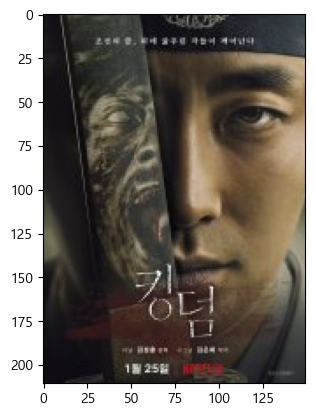

In [20]:
path = image_folder + '/' + target_data['Name'] + '.jpg'
image_pil = Image.open(path)
image = np.array(image_pil)
plt.imshow(image)

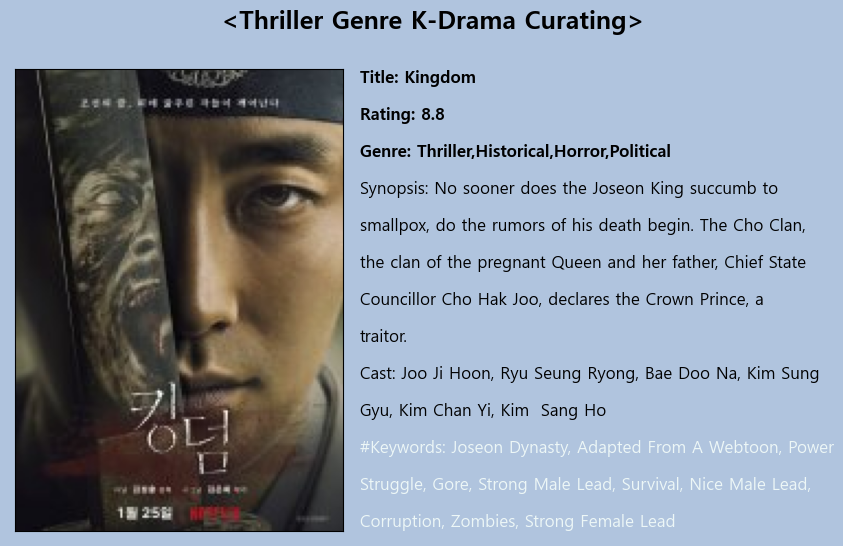

In [66]:
fig = plt.figure(figsize=(15,6), facecolor='lightsteelblue')
fig.suptitle(t= "       <"+input_genre + ' Genre K-Drama Curating>', fontweight ="bold", fontsize=18, ha='left') 

ax1 = fig.add_subplot(1, 1, 1)

# 포스터 이미지 출력
ax1.imshow(image)
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)

# 각각의 텍스트 준비
text1 = 'Title: ' + target_data['Name']
text2 = "Rating: " + str(target_data['Rating'])
text3 = 'Genre: ' + target_data['Genre']
text4 = "Synopsis: " + target_data['Synopsis']
text5 = 'Cast: ' + target_data['Cast']
text6 = "#Keywords: " + target_data['Tags']

# 텍스트 시작 위치 조정
text_x = 1.05
text_y = 1.0


# 각 텍스트를 줄바꿈하여 그리기
for text in [text1, text2, text3]:
    wrapped_text = textwrap.fill(text, width=60)  # 너비 조정
    lines = wrapped_text.split('\n')
    
    for line in lines:
        plt.text(text_x, text_y, line, fontsize=12, ha='left', va='top', fontweight ="bold", transform=plt.gca().transAxes)
        text_y -= 0.08  # 줄 간격 조정

# 자동 줄바꿈을 적용할 텍스트
wrapped_text4 = textwrap.fill(text4, width=60)  # 너비 조정
wrapped_text5 = textwrap.fill(text5, width=60)  # 너비 조정
wrapped_text6 = textwrap.fill(text6, width=60)  # 너비 조정

# 네 번째 텍스트 추가 (자동 줄바꿈)
lines4 = wrapped_text4.split('\n')
for line in lines4:
    plt.text(text_x, text_y, line, fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)
    text_y -= 0.08  # 줄 간격 조정
    
# 다섯 번째 텍스트 추가 (자동 줄바꿈)
lines5 = wrapped_text5.split('\n')
for line in lines5:
    plt.text(text_x, text_y, line, fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)
    text_y -= 0.08  # 줄 간격 조정

# 여섯 번째 텍스트 추가 (자동 줄바꿈)
lines6 = wrapped_text6.split('\n')
for line in lines6:
    plt.text(text_x, text_y, line, fontsize=12, ha='left', va='top', color='#edf7f7', transform=plt.gca().transAxes)
    text_y -= 0.08  # 줄 간격 조정




plt.show()